<a href="https://colab.research.google.com/github/bikash-bhoi/EIP4/blob/master/Session2%20Assignment/9th_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


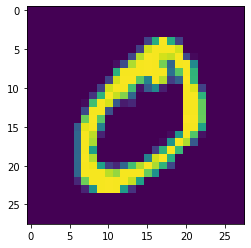

In [36]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [40]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
from keras.layers import Activation
model = Sequential()
 
model.add(Conv2D(8, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(16, 3, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(8, 1, 1, activation='relu', use_bias=False)) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Conv2D(8, 3, 3, activation='relu', use_bias=False))#10
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(8, 3, 3, activation='relu', use_bias=False))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(16, 3, 3, activation='relu', use_bias=False))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Conv2D(10, 6, 6, use_bias=False))
model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", u

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_38 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 8)        

In [44]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(lr * 1/(1 + 0.023 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.2), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.200000003.
60000/60000 [==============================] - 19s 317us/step - loss: 0.0713 - acc: 0.9777 - val_loss: 0.0309 - val_acc: 0.9897
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.1955034242.
60000/60000 [==============================] - 10s 175us/step - loss: 0.0607 - acc: 0.9814 - val_loss: 0.0449 - val_acc: 0.9856
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.1869057635.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0533 - acc: 0.9832 - val_loss: 0.0342 - val_acc: 0.9891
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.1748416806.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0500 - acc: 0.9844 - val_loss: 0.0384 - val_acc: 0.9883
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.1601114351.
60000/600

In [43]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01926184577558306, 0.9941]
